In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\archa\OneDrive\Desktop\Downloads\SMSSpamCollection",sep='\t',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [2]:
print('No. of ham msg',df[df[0]=='ham'].count())

No. of ham msg 0    4825
1    4825
dtype: int64


In [3]:
print('No. of ham msg',df[df[0]=='ham'][0].count())
print('No. of spam msg',df[df[0]=='spam'][0].count())

No. of ham msg 4825
No. of spam msg 747


In [4]:
df[0].value_counts()

0
ham     4825
spam     747
Name: count, dtype: int64

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(df[1],df[0],random_state=50)
print(xtrain.shape)
print(ytrain.shape)

(4179,)
(4179,)


In [7]:
vectoriser=TfidfVectorizer()
xtrain=vectoriser.fit_transform(xtrain)
xtest=vectoriser.transform(xtest)

In [8]:
xtrain.shape

(4179, 7380)

In [9]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [10]:
prediction=model.predict(xtest)

In [11]:
for i,pred in enumerate(prediction[:5]):
    print('predicted value',pred,'actual value',ytest[i:i+1])

predicted value spam actual value 3409    spam
Name: 0, dtype: object
predicted value ham actual value 2103    ham
Name: 0, dtype: object
predicted value ham actual value 2665    ham
Name: 0, dtype: object
predicted value ham actual value 3239    ham
Name: 0, dtype: object
predicted value spam actual value 1205    spam
Name: 0, dtype: object


In [12]:
# dummy confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
y_test=[0,0,0,0,0,1,1,1,1,1]
y_pred=[0,1,0,0,0,0,0,1,1,1]
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

[[4 1]
 [2 3]]


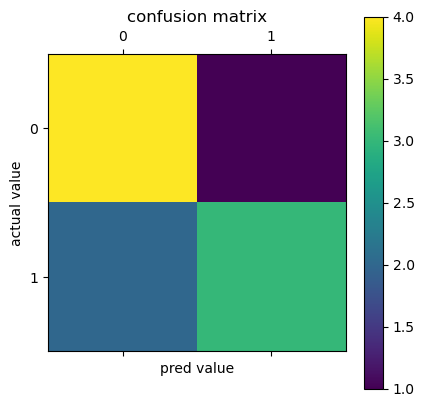

In [13]:
plt.matshow(conf_matrix)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('actual value')
plt.xlabel('pred value')
plt.show()

In [14]:
from sklearn.metrics import accuracy_score
y_pred,y_true = [0,1,1,0],[1,1,1,1]
print(accuracy_score(y_true,y_pred))

0.5


In [15]:
# cross validation score:- score that weget after cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain,cv=5) # by default its finding accuracy
print('scores',scores,'mean value',np.mean(scores))

scores [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862] mean value 0.9545348537375011


In [16]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
ytrain = lb.fit_transform(ytrain)
ytrain

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [17]:
model = LogisticRegression()
model.fit(xtrain,ytrain[:,0])

LogisticRegression()

In [18]:
scores = cross_val_score(model,xtrain,ytrain[:,0],cv=5,scoring='precision')
print('scores',scores,'mean value',np.mean(scores))

scores [0.98630137 1.         1.         1.         0.97530864] mean value 0.9923220023676645


In [19]:
scores = cross_val_score(model,xtrain,ytrain[:,0],cv=5,scoring='recall')
print('scores',scores,'mean value',np.mean(scores))

scores [0.63157895 0.68421053 0.61403509 0.73913043 0.69298246] mean value 0.6723874904652938


In [20]:
scores = cross_val_score(model,xtrain,ytrain[:,0],cv=5,scoring='f1')
print('scores',scores,'mean value',np.mean(scores))

scores [0.77005348 0.8125     0.76086957 0.85       0.81025641] mean value 0.8007358902819262


In [21]:
scores = cross_val_score(model,xtrain,ytrain[:,0],cv=5,scoring='accuracy')
print('scores',scores,'mean value',np.mean(scores))

scores [0.94856459 0.9569378  0.94736842 0.96411483 0.95568862] mean value 0.9545348537375011


In [22]:
ytest

3409    spam
2103     ham
2665     ham
3239     ham
1205    spam
        ... 
1091    spam
3861     ham
747      ham
1945     ham
5181     ham
Name: 0, Length: 1393, dtype: object

In [23]:
y_test=lb.transform(ytest)
y_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
y_predicted=model.predict(xtest)
y_predicted.shape

(1393,)

In [25]:
y_test.shape

(1393, 1)

In [26]:
y_test.shape[0]

1393

In [27]:
ytest=np.reshape(y_test,(y_test.shape[0]))
ytest.shape

(1393,)

[[1215    2]
 [  32  144]]


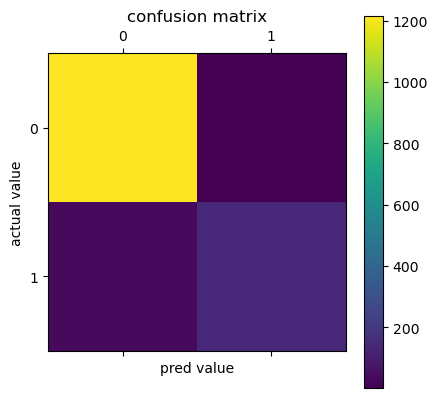

In [28]:
conf_matrix = confusion_matrix(ytest,y_predicted)
print(conf_matrix)
plt.matshow(conf_matrix)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('actual value')
plt.xlabel('pred value')
plt.show()